In [ ]:
#Installing libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the dataset
df_dataset = pd.read_csv("/content/drive/MyDrive/universal_top_spotify_songs.csv")
df_dataset.head()

spotify_id                                 name  \
0  2HafqoJbgXdtjwCOvNEF14                          Si No Estás   
1  7x9aauaA9cu6tyfpHnqDLo  Seven (feat. Latto) (Explicit Ver.)   
2  3rUGC1vUpkDG9CZFHMur1t                               greedy   
3  4MjDJD8cW7iVeWInc2Bdyj                               MONACO   
4  7iQXYTyuG13aoeHxGG28Nh                          PERRO NEGRO   

            artists  daily_rank  daily_movement  weekly_movement country  \
0    iñigo quintero           1               0                3     NaN   
1  Jung Kook, Latto           2               4                0     NaN   
2        Tate McRae           3              -1                2     NaN   
3         Bad Bunny           4              -1               -3     NaN   
4   Bad Bunny, Feid           5               0                1     NaN   

  snapshot_date  popularity  is_explicit  ...  key loudness mode  speechiness  \
0    2023-10-27          97        False  ...    5   -8.720    1       0.0285   
1    2023-10-27          97         True  ...   11   -4.107    1       0.0434   
2    2023-10-27          99         True  ...    6   -3.180    0       0.0319   
3    2023-10-27          96         True  ...    4   -5.009    0       0.0680   
4    2023-10-27          94         True  ...    5   -2.248    1       0.2620   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0        0.8270          0.000000    0.1380    0.524   98.224               4  
1        0.3110          0.000000    0.0815    0.890  124.997               4  
2        0.2560          0.000000    0.1140    0.844  111.018               1  
3        0.1500          0.000402    0.5800    0.130  139.056               4  
4        0.0887          0.000022    0.1790    0.345   96.057               4  

[5 rows x 25 columns]

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/universal_top_spotify_songs.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Data Preparation and analysis
#load the data
spotify_song_data= pd.read_csv("/content/drive/MyDrive/universal_top_spotify_songs.csv")
spotify_song_info= pd.read_csv("/content/drive/MyDrive/universal_top_spotify_songs.csv")

In [ ]:
song_info=spotify_song_info.copy()

In [ ]:
song_data=spotify_song_data.copy()
song_data.head(3)

spotify_id                                 name  \
0  2HafqoJbgXdtjwCOvNEF14                          Si No Estás   
1  7x9aauaA9cu6tyfpHnqDLo  Seven (feat. Latto) (Explicit Ver.)   
2  3rUGC1vUpkDG9CZFHMur1t                               greedy   

            artists  daily_rank  daily_movement  weekly_movement country  \
0    iñigo quintero           1               0                3     NaN   
1  Jung Kook, Latto           2               4                0     NaN   
2        Tate McRae           3              -1                2     NaN   

  snapshot_date  popularity  is_explicit  ...  key loudness mode  speechiness  \
0    2023-10-27          97        False  ...    5   -8.720    1       0.0285   
1    2023-10-27          97         True  ...   11   -4.107    1       0.0434   
2    2023-10-27          99         True  ...    6   -3.180    0       0.0319   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  
0         0.827               0.0    0.1380    0.524   98.224               4  
1         0.311               0.0    0.0815    0.890  124.997               4  
2         0.256               0.0    0.1140    0.844  111.018               1  

[3 rows x 25 columns]

In [ ]:
song_data.shape

(36523, 25)

In [ ]:
#Cleaning data
song_data.columns[song_data.isnull().any()]

Index(['name', 'artists', 'country', 'album_name', 'album_release_date'], dtype='object')

In [ ]:
song_data.isnull().sum()

spotify_id              0
name                    1
artists                 1
daily_rank              0
daily_movement          0
weekly_movement         0
country               502
snapshot_date           0
popularity              0
is_explicit             0
duration_ms             0
album_name              1
album_release_date      1
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

In [ ]:
# Remove rows with null values
df_cleaned = df_dataset.dropna()
df_cleaned.head()

spotify_id                               name  \
52  5yyYL1FpimADTIftYQU0cg                              iPlan   
53  7HmE17lcfpENCJkuurXDvh                              Dalie   
54  5C9h6ZyskUiyAVDmhSfSdP  Imnandi lento (feat. Tman Xpress)   
55  5aIVCx5tnk0ntmdiinnYvw                              Water   
56  7JbLSEDlRdoJaXk5ddZae2                              Paris   

                                              artists  daily_rank  \
52                         Dlala Thukzin, Zaba, Sykes           1   
53  Kamo Mphela, Tyler ICU, Khalil Harrison, Baby ...           2   
54  Mellow & Sleazy, SjavasDaDeejay, TitoM, Tman X...           3   
55                                               Tyla           4   
56                       Mthandeni SK, Lwah Ndlunkulu           5   

    daily_movement  weekly_movement country snapshot_date  popularity  \
52               0                0      ZA    2023-10-27          67   
53               0                0      ZA    2023-10-27          68   
54               0                0      ZA    2023-10-27          70   
55               1                2      ZA    2023-10-27          94   
56              -1                0      ZA    2023-10-27          63   

    is_explicit  ...  key loudness mode  speechiness  acousticness  \
52        False  ...    5  -10.253    0       0.0384       0.07090   
53        False  ...    1   -9.984    1       0.0515       0.00005   
54        False  ...    6  -13.325    0       0.0667       0.06000   
55        False  ...    3   -3.495    0       0.0755       0.08560   
56        False  ...    1   -4.659    1       0.0693       0.02960   

    instrumentalness  liveness  valence    tempo  time_signature  
52          0.584000    0.1010    0.748  118.004               4  
53          0.090100    0.1220    0.160  113.009               4  
54          0.000776    0.0231    0.632  111.982               4  
55          0.000000    0.1370    0.519  117.187               4  
56          0.001990    0.1900    0.964  154.639               4  

[5 rows x 25 columns]

In [ ]:
# Filter rows based on values in the 'country' column
selected_countries = ['US', 'CA', 'IN', 'MX','AU','NZ','GB']
filtered_df = df_cleaned[df_cleaned['country'].isin(selected_countries)]
filtered_df.head()

spotify_id                                           name  \
260  2YSzYUF3jWqb9YP9VXmpjE                             IDGAF (feat. Yeat)   
261  4MjDJD8cW7iVeWInc2Bdyj                                         MONACO   
262  3vkCueOmm7xQDoJ17W1Pm3                          My Love Mine All Mine   
263  1BxfuPKGuaTgP7aM0Bbdwr                                   Cruel Summer   
264  4KULAymBBJcPRpk1yO4dOG  I Remember Everything (feat. Kacey Musgraves)   

                         artists  daily_rank  daily_movement  weekly_movement  \
260                  Drake, Yeat           1               0                0   
261                    Bad Bunny           2               1                0   
262                       Mitski           3              -1                0   
263                 Taylor Swift           4               0                3   
264  Zach Bryan, Kacey Musgraves           5               1               -1   

    country snapshot_date  popularity  is_explicit  ...  key loudness mode  \
260      US    2023-10-27          93         True  ...    8   -8.399    1   
261      US    2023-10-27          96         True  ...    4   -5.009    0   
262      US    2023-10-27          96        False  ...    9  -14.958    1   
263      US    2023-10-27         100        False  ...    9   -5.707    1   
264      US    2023-10-27          94        False  ...    0   -7.746    1   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
260       0.2710        0.0464          0.000089     0.205    0.138  136.952   
261       0.0680        0.1500          0.000402     0.580    0.130  139.056   
262       0.0321        0.8680          0.135000     0.158    0.121  113.950   
263       0.1570        0.1170          0.000021     0.105    0.564  169.994   
264       0.0459        0.5540          0.000002     0.102    0.155   77.639   

     time_signature  
260               4  
261               4  
262               4  
263               4  
264               4  

[5 rows x 25 columns]

In [ ]:
filtered_df

spotify_id                                           name  \
260    2YSzYUF3jWqb9YP9VXmpjE                             IDGAF (feat. Yeat)   
261    4MjDJD8cW7iVeWInc2Bdyj                                         MONACO   
262    3vkCueOmm7xQDoJ17W1Pm3                          My Love Mine All Mine   
263    1BxfuPKGuaTgP7aM0Bbdwr                                   Cruel Summer   
264    4KULAymBBJcPRpk1yO4dOG  I Remember Everything (feat. Kacey Musgraves)   
...                       ...                                            ...   
36368  7x9aauaA9cu6tyfpHnqDLo            Seven (feat. Latto) (Explicit Ver.)   
36369  3USxtqRwSYz57Ewm6wWRMp                                     Heat Waves   
36370  7qEHsqek33rTcFNT9PFqLf                              Someone You Loved   
36371  5W4kiM2cUYBJXKRudNyxjW                                      You Proof   
36372  23RoR84KodL5HWvUTneQ1w                   (It Goes Like) Nanana - Edit   

                           artists  daily_rank  daily_movement  \
260                    Drake, Yeat           1               0   
261                      Bad Bunny           2               1   
262                         Mitski           3              -1   
263                   Taylor Swift           4               0   
264    Zach Bryan, Kacey Musgraves           5               1   
...                            ...         ...             ...   
36368             Jung Kook, Latto          46               4   
36369                Glass Animals          47               3   
36370                Lewis Capaldi          48               2   
36371                Morgan Wallen          49               1   
36372                    Peggy Gou          50               0   

       weekly_movement country snapshot_date  popularity  is_explicit  ...  \
260                  0      US    2023-10-27          93         True  ...   
261                  0      US    2023-10-27          96         True  ...   
262                  0      US    2023-10-27          96        False  ...   
263                  3      US    2023-10-27         100        False  ...   
264                 -1      US    2023-10-27          94        False  ...   
...                ...     ...           ...         ...          ...  ...   
36368                0      AU    2023-10-18          98         True  ...   
36369                0      AU    2023-10-18          91        False  ...   
36370                0      AU    2023-10-18          90        False  ...   
36371                0      AU    2023-10-18          85        False  ...   
36372                0      AU    2023-10-18          92        False  ...   

       key loudness mode  speechiness  acousticness  instrumentalness  \
260      8   -8.399    1       0.2710        0.0464          0.000089   
261      4   -5.009    0       0.0680        0.1500          0.000402   
262      9  -14.958    1       0.0321        0.8680          0.135000   
263      9   -5.707    1       0.1570        0.1170          0.000021   
264      0   -7.746    1       0.0459        0.5540          0.000002   
...    ...      ...  ...          ...           ...               ...   
36368   11   -4.107    1       0.0434        0.3110          0.000000   
36369   11   -6.900    1       0.0944        0.4400          0.000007   
36370    1   -5.679    1       0.0319        0.7510          0.000000   
36371    9   -5.007    1       0.0345        0.2650          0.000000   
36372    7   -5.681    0       0.0352        0.1200          0.188000   

       liveness  valence    tempo  time_signature  
260      0.2050    0.138  136.952               4  
261      0.5800    0.130  139.056               4  
262      0.1580    0.121  113.950               4  
263      0.1050    0.564  169.994               4  
264      0.1020    0.155   77.639               4  
...         ...      ...      ...             ...  
36368    0.0815    0.890  124.997               4  
36369    0.0921    0.531   80.870  

In [ ]:
#Analysis
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          36523 non-null  object 
 1   name                36522 non-null  object 
 2   artists             36522 non-null  object 
 3   daily_rank          36523 non-null  int64  
 4   daily_movement      36523 non-null  int64  
 5   weekly_movement     36523 non-null  int64  
 6   country             36021 non-null  object 
 7   snapshot_date       36523 non-null  object 
 8   popularity          36523 non-null  int64  
 9   is_explicit         36523 non-null  bool   
 10  duration_ms         36523 non-null  int64  
 11  album_name          36522 non-null  object 
 12  album_release_date  36522 non-null  object 
 13  danceability        36523 non-null  float64
 14  energy              36523 non-null  float64
 15  key                 36523 non-null  int64  
 16  loud

In [ ]:
song_data.duration_ms= song_data.duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data['mode'] = song_data['mode'].astype(float)

In [ ]:
song_data.describe()

daily_rank  daily_movement  weekly_movement    popularity  \
count  36523.000000    36523.000000     36523.000000  36523.000000   
mean      25.506722        2.660105        14.994907     78.566219   
std       14.443285        9.556794        16.933131     15.203067   
min        1.000000      -38.000000       -36.000000      0.000000   
25%       13.000000       -1.000000         0.000000     67.000000   
50%       25.000000        0.000000        10.000000     83.000000   
75%       38.000000        2.000000        29.000000     90.000000   
max       50.000000       49.000000        49.000000    100.000000   

         duration_ms  danceability        energy           key      loudness  \
count   36523.000000  36523.000000  36523.000000  36523.000000  36523.000000   
mean   194754.706897      0.690499      0.645530      5.534841     -6.636495   
std     49605.986935      0.135372      0.161009      3.467374      2.652485   
min         0.000000      0.222000      0.024200      0.000000    -22.497000   
25%    162833.000000      0.598000      0.548000      2.000000     -8.042000   
50%    188219.000000      0.706000      0.669000      6.000000     -6.210000   
75%    220784.000000      0.800000      0.753000      9.000000     -4.915000   
max    641941.000000      0.974000      0.997000     11.000000      1.155000   

               mode   speechiness  acousticness  instrumentalness  \
count  36523.000000  36523.000000  36523.000000      36523.000000   
mean       0.488952      0.110819      0.290384          0.018633   
std        0.499885      0.100844      0.254956          0.095503   
min        0.000000      0.023200      0.000008          0.000000   
25%        0.000000      0.042600      0.085600          0.000000   
50%        0.000000      0.066500      0.207000          0.000002   
75%        1.000000      0.146000      0.455000          0.000100   
max        1.000000      0.784000      0.984000          0.968000   

           liveness       valence         tempo  time_signature  
count  36523.000000  36523.000000  36523.000000    36523.000000  
mean       0.172432      0.529065    122.115037        3.913616  
std        0.123227      0.225337     27.665221        0.428838  
min        0.015400      0.037300     47.914000        1.000000  
25%        0.098500      0.363000     99.971000        4.000000  
50%        0.120000      0.524000    120.025000        4.000000  
75%        0.211000      0.710000    140.055000        4.000000  
max        0.968000      0.978000    217.969000        5.000000

In [ ]:
#calculating mean of column popularity
df = pd.read_csv("/content/drive/MyDrive/universal_top_spotify_songs.csv")

# Specify the column for which you want to calculate the mean
column_name = 'popularity'

# Check if the specified column exists in the DataFrame
if column_name in df.columns:
    # Calculate the mean of the specified column
    mean_value = df[column_name].mean()

    # Print the result
    print(f"The mean of the '{column_name}' column is: {mean_value}")
else:
    print(f"Column '{column_name}' not found in the dataset.")

The mean of the 'popularity' column is: 78.56621854721682


In [ ]:
#Checked popularity rating of songs that have been popular for the past year in Spotify for 7 countries and took the mean value of them (78.5) . According to this value, the songs has above this rating could remain on the top lists for a long time. If popularity of a song is higher than 78.5 we labeled it "1" and if is not we labeled it "0". So we have "1" for the popular songs and "0" for the unpopular ones.

song_data["popularity"]= [ 1 if i>=78.5 else 0 for i in song_data.popularity ]
song_data["popularity"].value_counts()

1    21699
0    14824
Name: popularity, dtype: int64

In [ ]:
#popular songs data
a=song_data[song_data["popularity"]==1]
a.describe()

daily_rank  daily_movement  weekly_movement  popularity  \
count  21699.000000    21699.000000     21699.000000     21699.0   
mean      24.468132        2.557537        15.285589         1.0   
std       14.574647        9.443949        17.384974         0.0   
min        1.000000      -27.000000       -36.000000         1.0   
25%       12.000000       -1.000000         0.000000         1.0   
50%       24.000000        0.000000        10.000000         1.0   
75%       37.000000        2.000000        30.000000         1.0   
max       50.000000       49.000000        49.000000         1.0   

         duration_ms  danceability        energy           key      loudness  \
count   21699.000000  21699.000000  21699.000000  21699.000000  21699.000000   
mean   196576.755104      0.691815      0.649661      5.426471     -6.257280   
std     47493.597552      0.136728      0.155309      3.426751      2.579213   
min     61673.000000      0.265000      0.091100      0.000000    -17.665000   
25%    167303.000000      0.586000      0.555000      2.000000     -7.749000   
50%    189901.000000      0.705000      0.671000      5.000000     -5.745000   
75%    222369.000000      0.802000      0.744000      8.000000     -4.664000   
max    641941.000000      0.969000      0.990000     11.000000     -0.504000   

               mode   speechiness  acousticness  instrumentalness  \
count  21699.000000  21699.000000  21699.000000      21699.000000   
mean       0.518227      0.106143      0.288584          0.018314   
std        0.499679      0.095794      0.254870          0.095894   
min        0.000000      0.023200      0.000008          0.000000   
25%        0.000000      0.041900      0.085600          0.000000   
50%        1.000000      0.064400      0.189000          0.000002   
75%        1.000000      0.136000      0.443000          0.000068   
max        1.000000      0.601000      0.970000          0.930000   

           liveness       valence         tempo  time_signature  
count  21699.000000  21699.000000  21699.000000    21699.000000  
mean       0.171677      0.524023    122.294787        3.887230  
std        0.119475      0.234583     27.393548        0.480759  
min        0.023200      0.066700     59.157000        1.000000  
25%        0.098600      0.359000     99.974000        4.000000  
50%        0.119000      0.524000    120.025000        4.000000  
75%        0.211000      0.726000    140.098000        4.000000  
max        0.958000      0.971000    207.924000        5.000000

In [ ]:

song_data.corr()

daily_rank  daily_movement  weekly_movement  popularity  \
daily_rank          1.000000       -0.190605        -0.547028   -0.087000   
daily_movement     -0.190605        1.000000        -0.179953   -0.012985   
weekly_movement    -0.547028       -0.179953         1.000000    0.020769   
popularity         -0.087000       -0.012985         0.020769    1.000000   
is_explicit        -0.100203        0.009724         0.040397    0.180682   
duration_ms         0.046929       -0.010298        -0.034659    0.044439   
danceability       -0.097750        0.015714         0.054923    0.011760   
energy              0.030390        0.000731        -0.004667    0.031042   
key                -0.003231        0.001123         0.008028   -0.037814   
loudness            0.019556       -0.000258         0.000324    0.172972   
mode               -0.016850        0.001507         0.008413    0.070854   
speechiness        -0.038141        0.000444         0.007618   -0.056100   
acousticness       -0.043678        0.001854         0.014325   -0.008541   
instrumentalness    0.037114       -0.001773        -0.021640   -0.004051   
liveness            0.021496       -0.002833        -0.010597   -0.007413   
valence            -0.027676        0.005560         0.034323   -0.027071   
tempo              -0.004211       -0.002689        -0.002786    0.007861   
time_signature      0.062869       -0.011253        -0.039456   -0.074444   

                  is_explicit  duration_ms  danceability    energy       key  \
daily_rank          -0.100203     0.046929     -0.097750  0.030390 -0.003231   
daily_movement       0.009724    -0.010298      0.015714  0.000731  0.001123   
weekly_movement      0.040397    -0.034659      0.054923 -0.004667  0.008028   
popularity           0.180682     0.044439      0.011760  0.031042 -0.037814   
is_explicit          1.000000     0.024751      0.335196  0.129530 -0.042298   
duration_ms          0.024751     1.000000     -0.209842 -0.076706 -0.064456   
danceability         0.335196    -0.209842      1.000000  0.230780 -0.009488   
energy               0.129530    -0.076706      0.230780  1.000000  0.091140   
key                 -0.042298    -0.064456     -0.009488  0.091140  1.000000   
loudness             0.148164    -0.045453      0.228317  0.760969  0.038795   
mode                -0.052460     0.075244     -0.157633 -0.050059 -0.058831   
speechiness          0.317163     0.004852      0.226139  0.001226 -0.035532   
acousticness        -0.169731     0.048983     -0.288263 -0.580629 -0.000050   
instrumentalness    -0.001215    -0.008303     -0.066782  0.000747  0.020417   
liveness            -0.025708    -0.034534     -0.108580  0.095714  0.008325   
valence             -0.031439    -0.174862      0.360482  0.349921  0.103928   
tempo               -0.013882    -0.027698     -0.150680  0.104742  0.125789   
time_signature      -0.073800     0.113664      0.033296  0.011789 -0.032696   

                  loudness      mode  speechiness  acousticness  \
daily_rank        0.019556 -0.016850    -0.038141     -0.043678   
daily_movement   -0.000258  0.001507     0.000444      0.001854   
weekly_movement   0.000324  0.008413     0.007618      0.014325   
popularity        0.172972  0.070854    -0.056100     -0.008541   
is_explicit       0.148164 -0.052460     0.317163     -0.169731   
duration_ms      -0.045453  0.075244     0.004852      0.048983   
danceability      0.228317 -0.157633     0.226139     -0.288263   
energy            0.760969 -0.050059     0.001226     -0.580629   
key               0.038795 -0.058831    -0.035532     -0.000050   
loudness          1.000000 -0.027219    -0.070208     -0.459233   
mode             -0.027219  1.000000    -0.036208     -0.007011   
speechiness      -0.070208 -0.036208     1.000000     -0.041249   
acousticness     -0.459233 -0.007011    -0.041249      1.000000   
instrumentalness -0.118700 -0.011426    -0.027320      0.007129   
liveness          0.073785 -

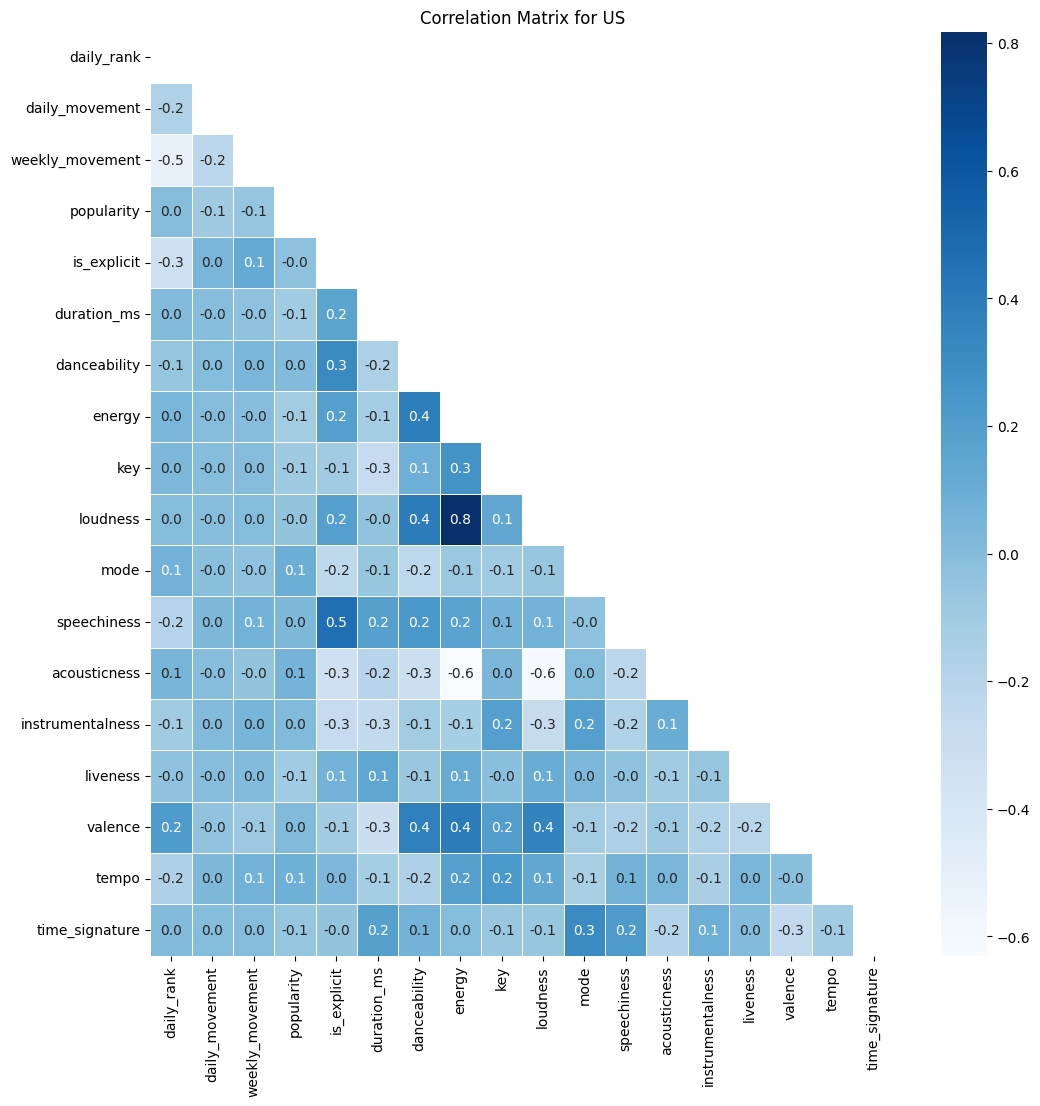

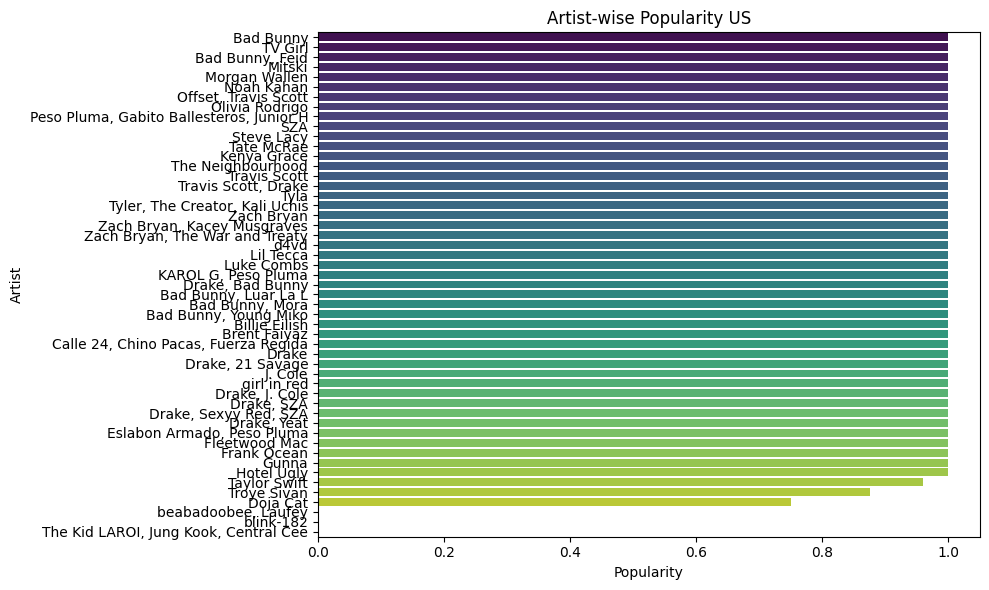

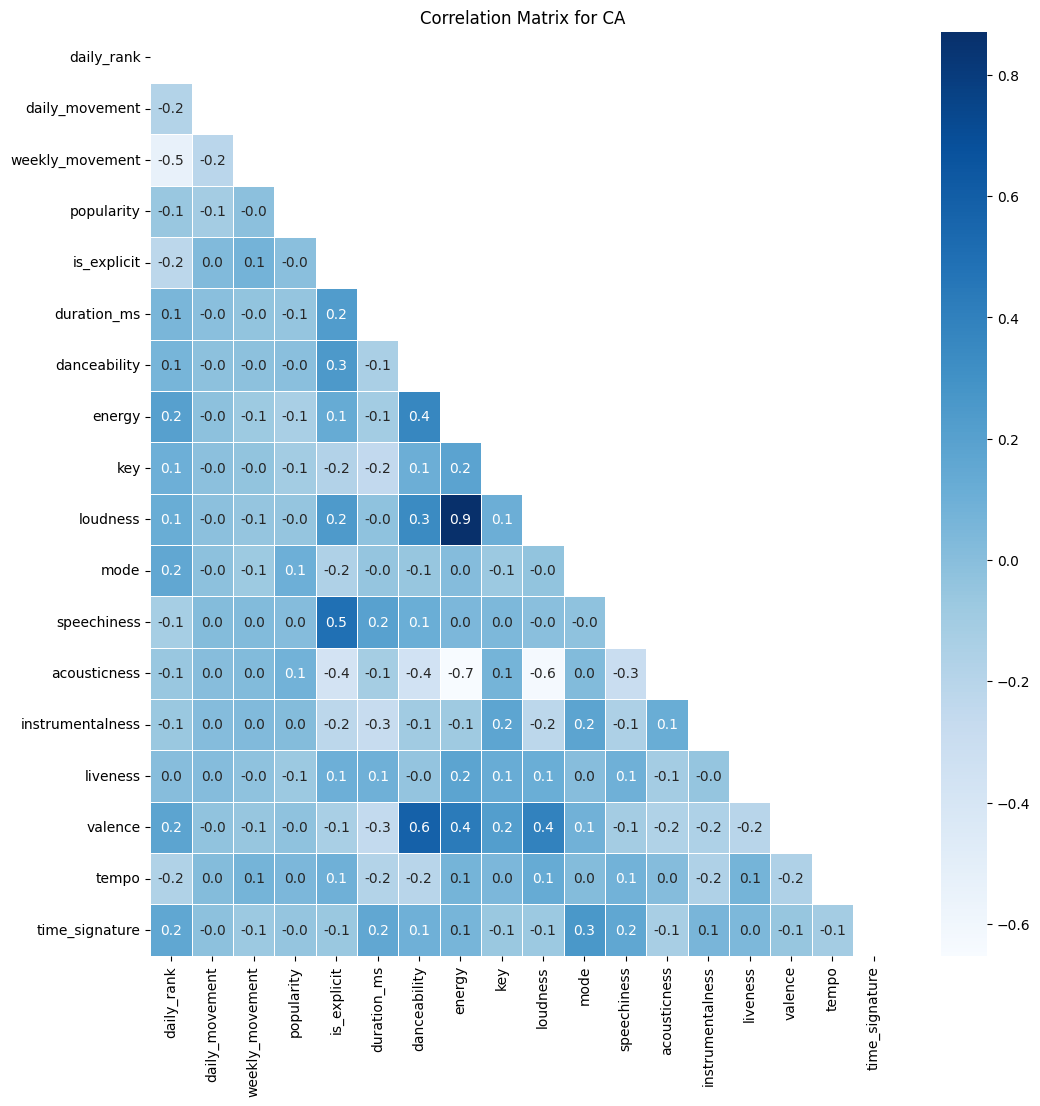

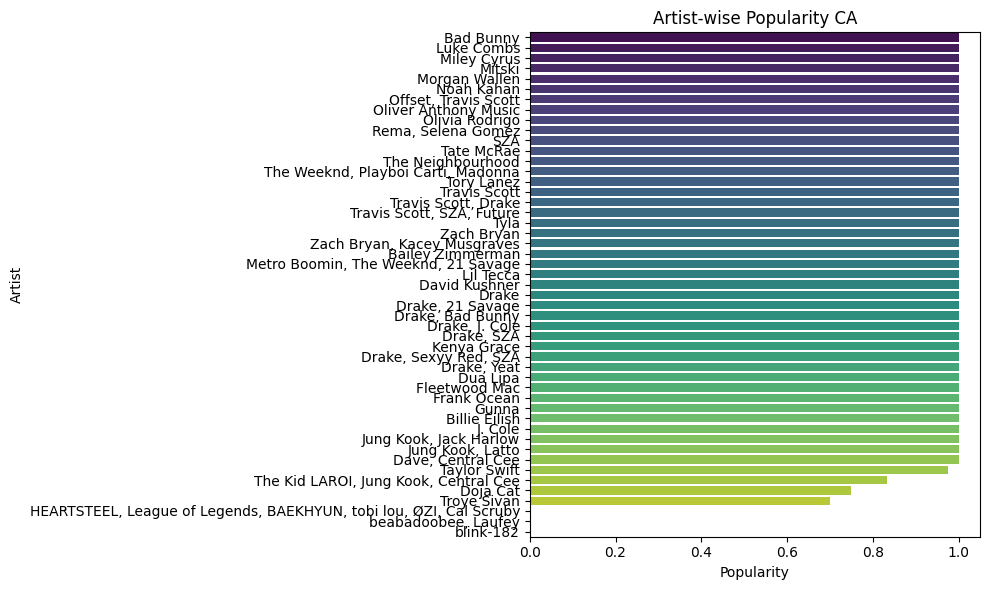

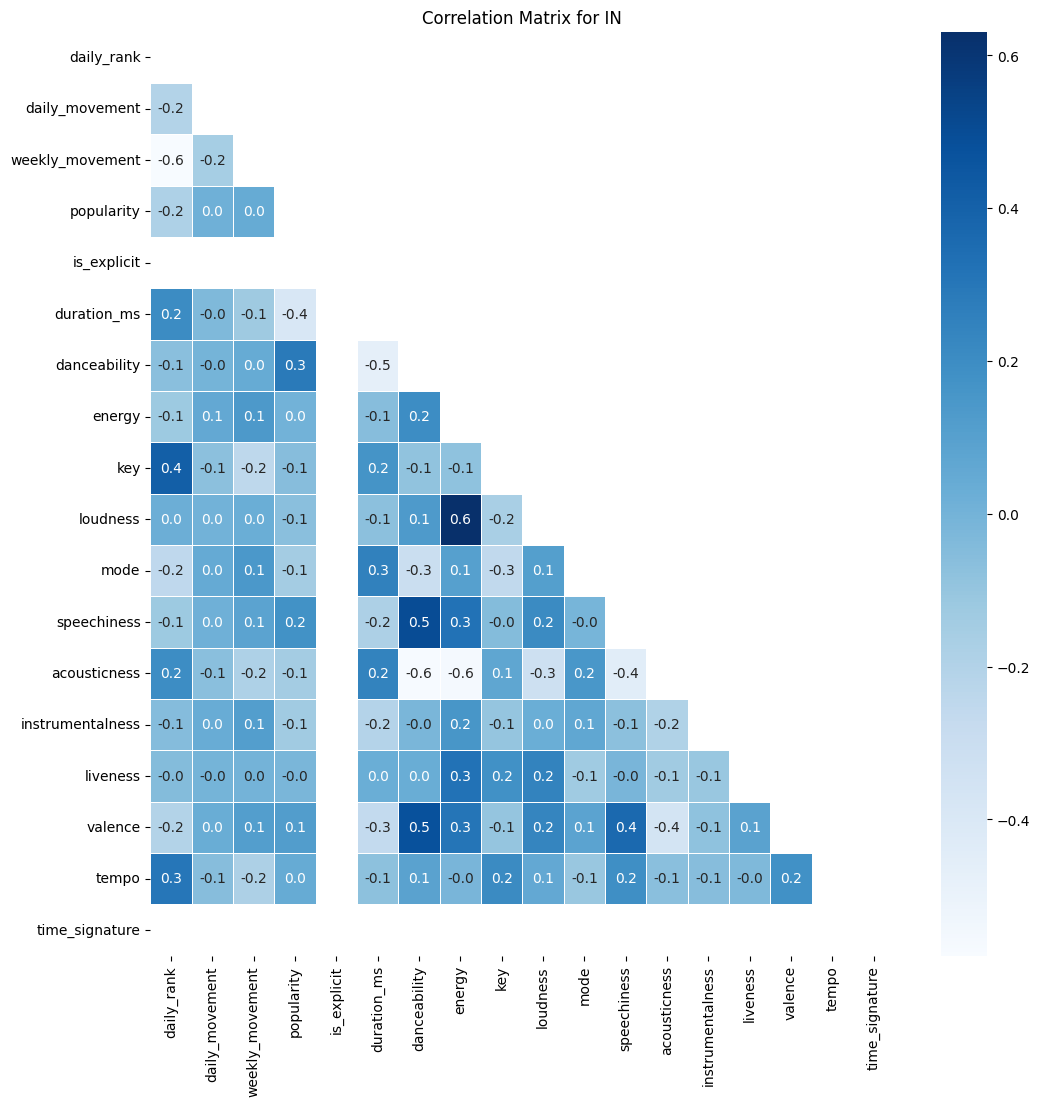

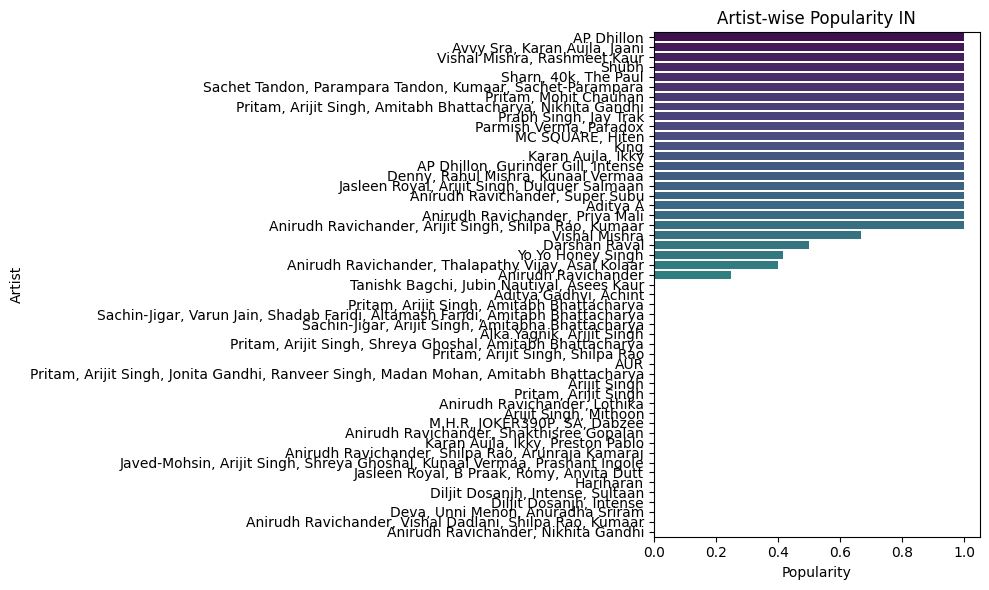

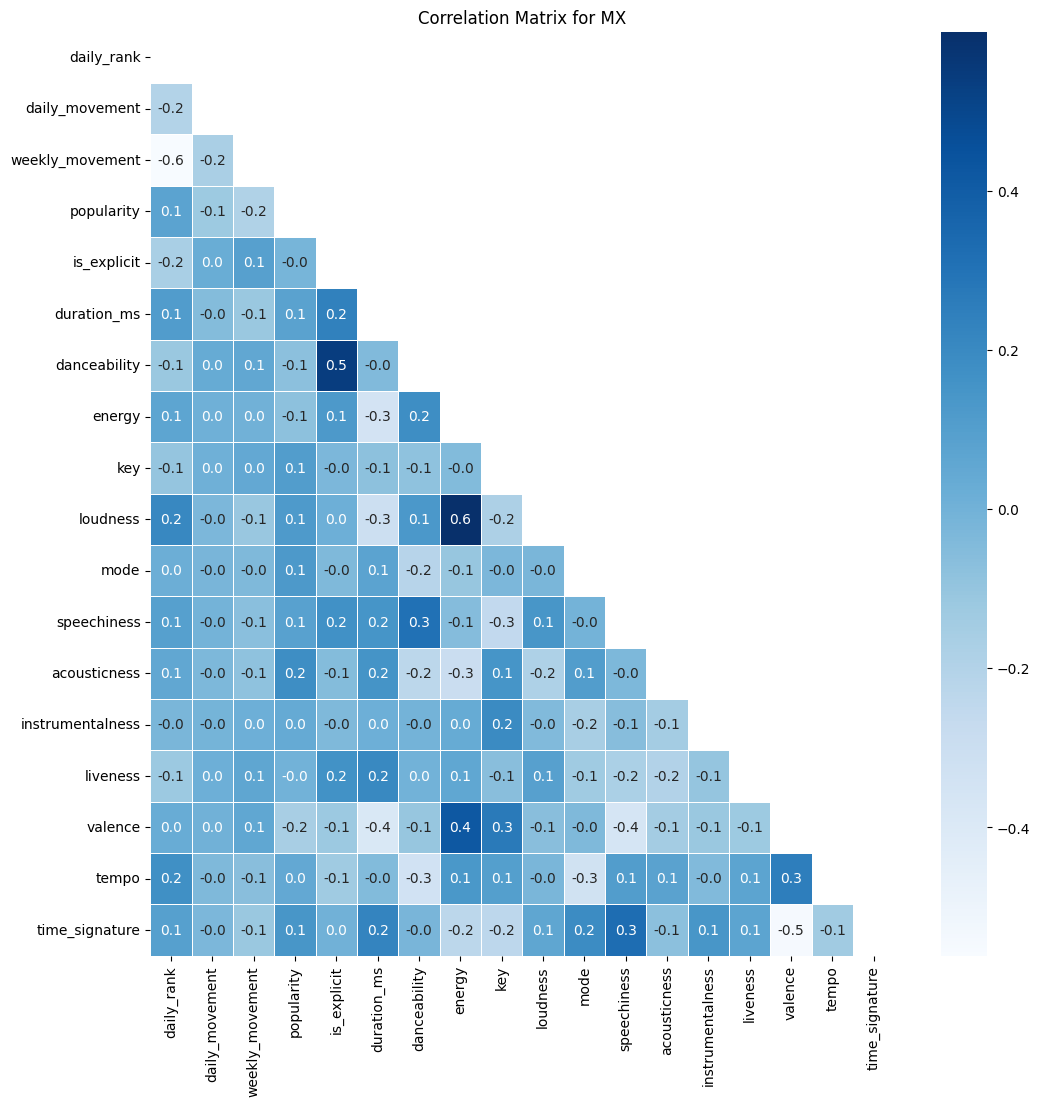

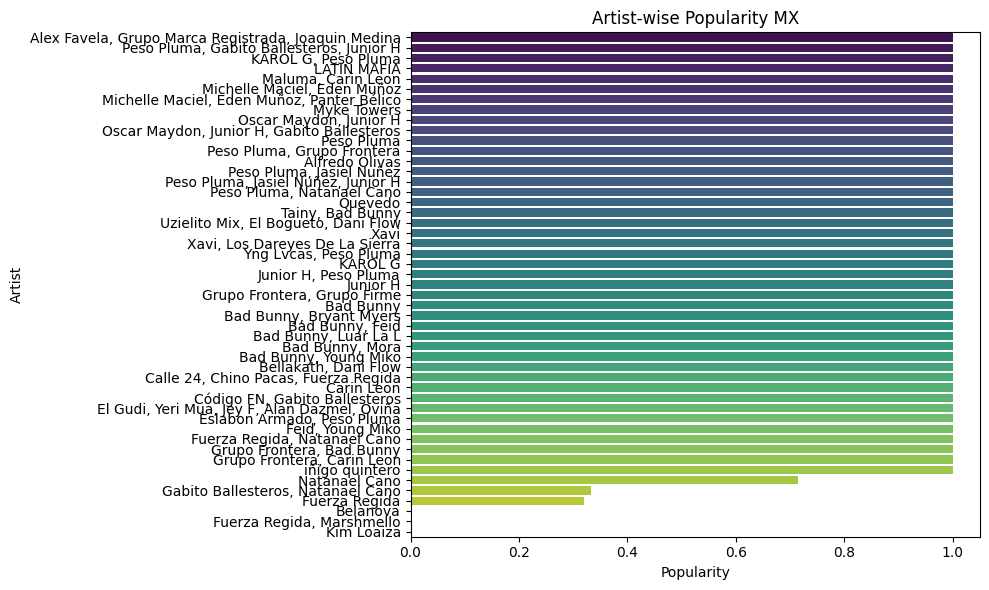

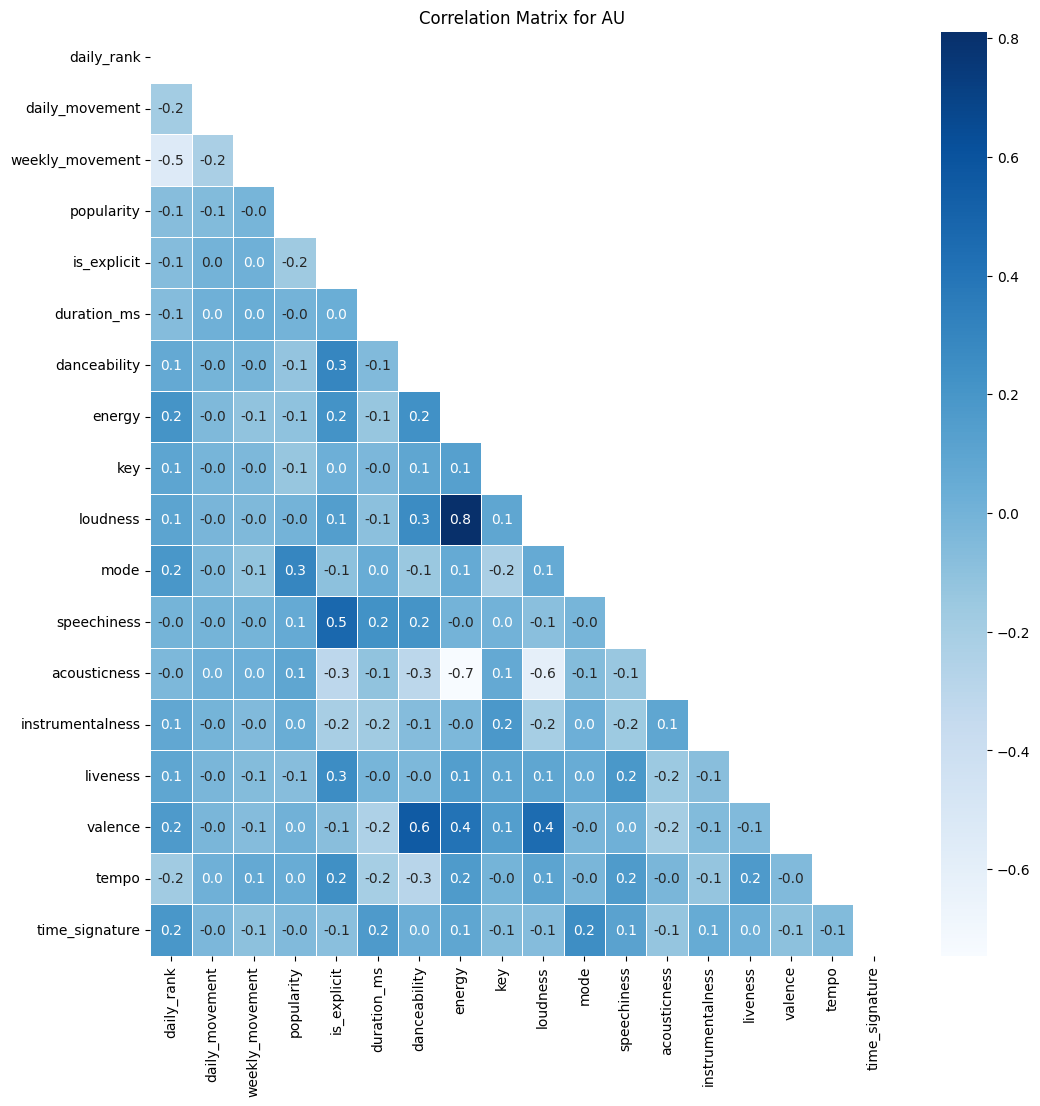

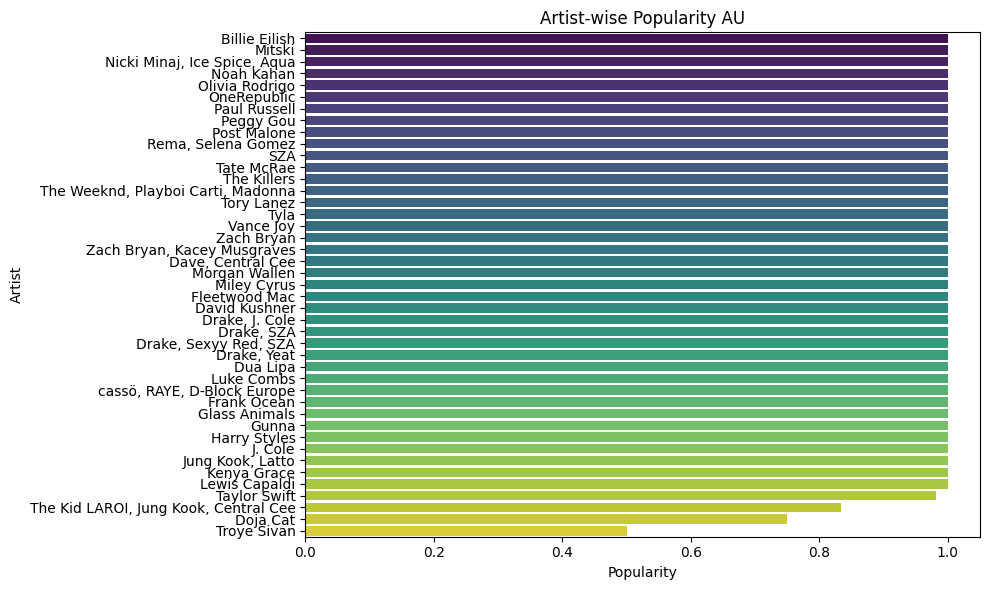

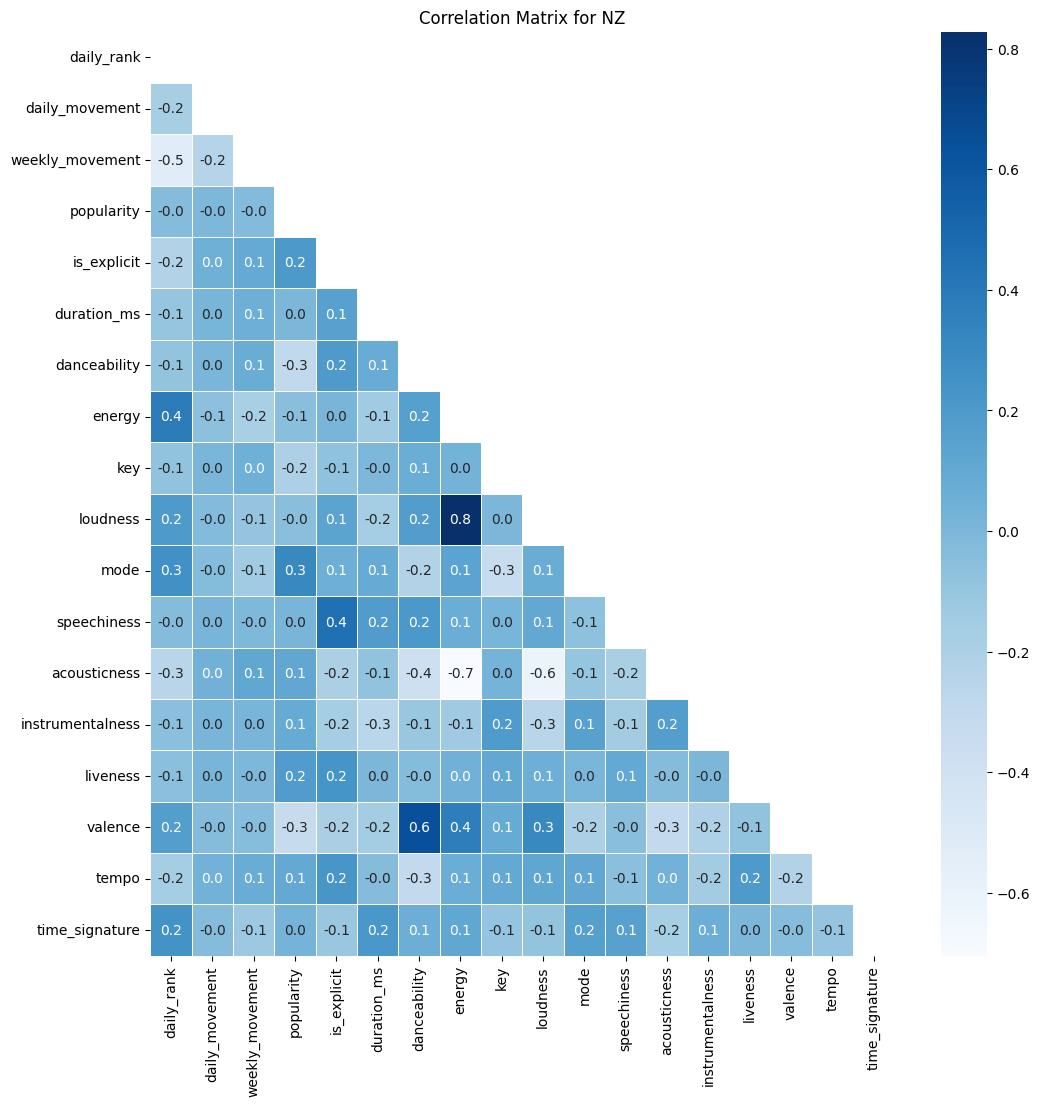

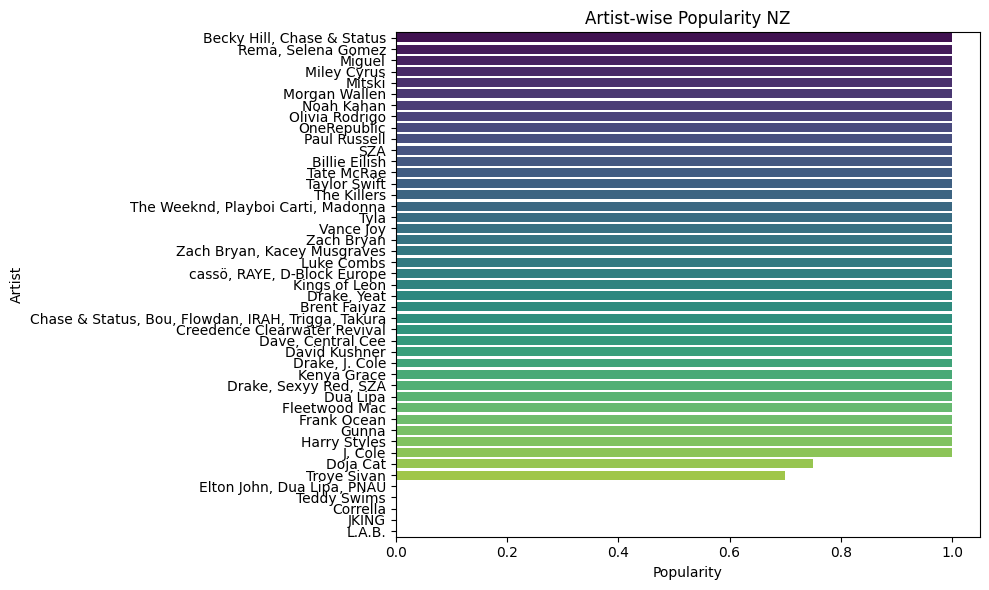

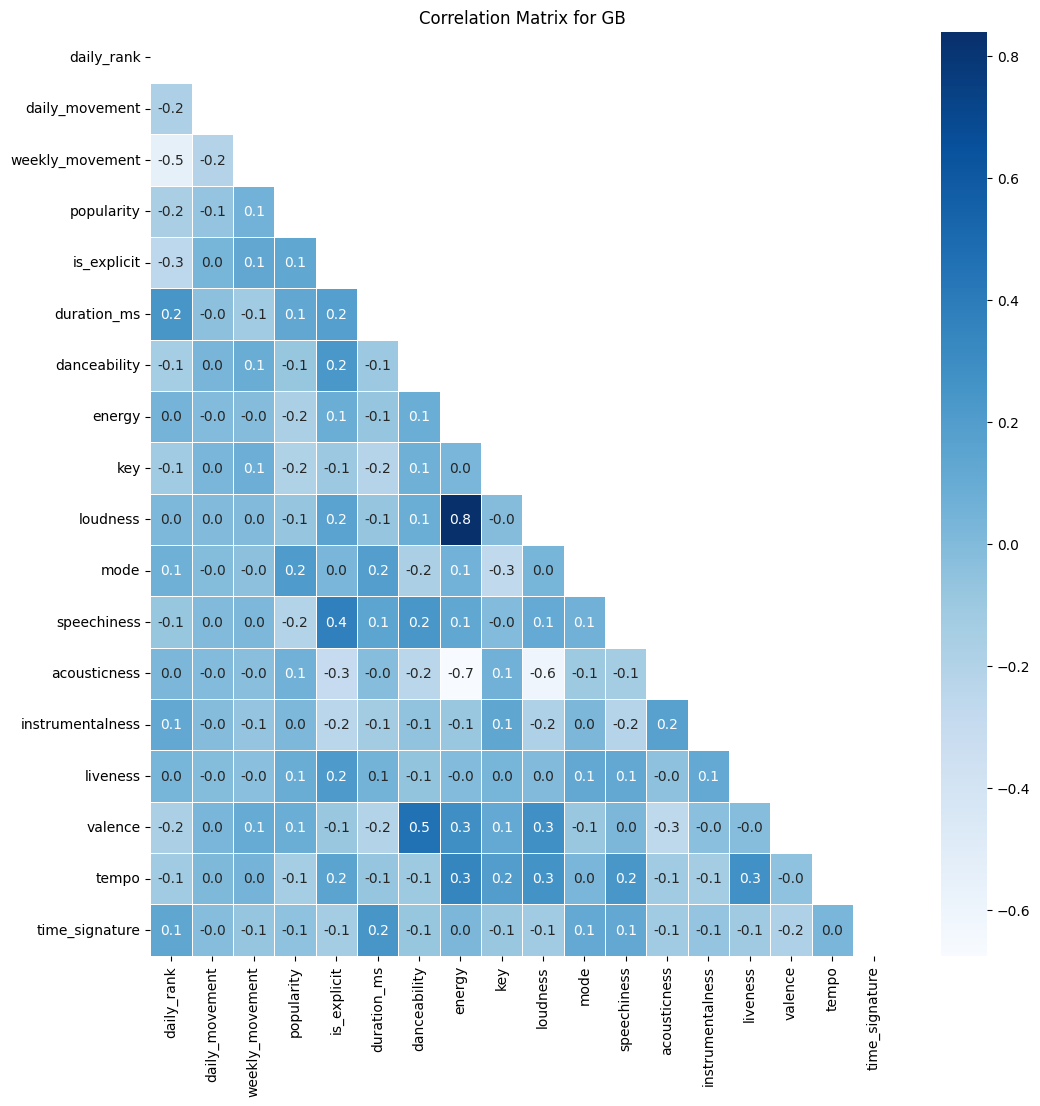

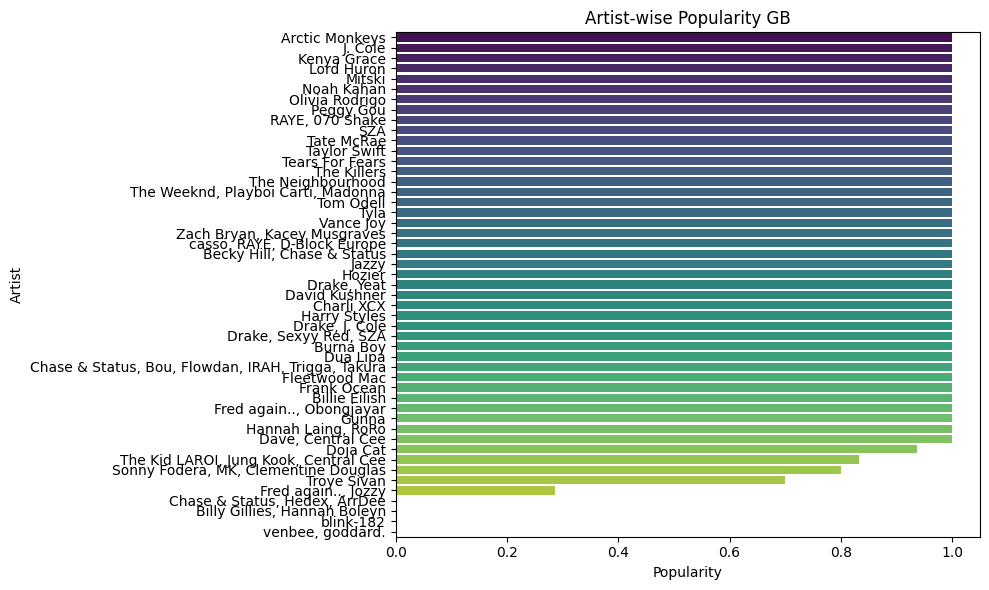

In [ ]:
#Correlation on how popularity and other attributes are related. Also, how the popularity plays a major role in the artist over all countries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Define the selected countries
selected_countries = ['US', 'CA', 'IN', 'MX', 'AU', 'NZ', 'GB']

# Iterate through each country
for country in selected_countries:
    # Filter the data for the current country
    filtered_data = song_data[song_data['country'] == country]

    # Plot the correlation matrix for the current country
    f, ax = plt.subplots(figsize=(12, 12))

    # Create a mask for the upper triangle
    mask = np.zeros_like(filtered_data.corr())
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap for the current country
    sns.heatmap(filtered_data.corr(), annot=True, linewidths=0.4, linecolor="white", fmt='.1f', ax=ax, cmap="Blues", mask=mask)

    ax.set_title(f'Correlation Matrix for {country}')
    plt.show()

    # Group by artist, calculate mean popularity
    grouped_data = filtered_data.groupby('artists')['popularity'].mean().reset_index()

    # Sort the data by popularity in descending order
    sorted_data = grouped_data.sort_values(by='popularity', ascending=False)
    top_country_data = sorted_data.head(10)

    # Plot bar chart for artist popularity
    plt.figure(figsize=(10, 6))
    sns.barplot(x='popularity', y='artists', data=sorted_data, palette='viridis')
    plt.title(f'Artist-wise Popularity {country}')
    plt.xlabel('Popularity')
    plt.ylabel('Artist')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
#Happy or sad songs based on audio valence taken on considering top 500 songs
song_data3 = song_data.copy()

top_500_songs = song_data3.nlargest(500, 'popularity')

# Apply the condition to the 'valence' column
top_500_songs["valence"] = ["Happy" if i >= 0.5 else "Sad" for i in top_500_songs.valence]

# Display the value counts for the top 500 songs
valence_counts = top_500_songs["valence"].value_counts()
print(valence_counts)


Happy    259
Sad      241
Name: valence, dtype: int64


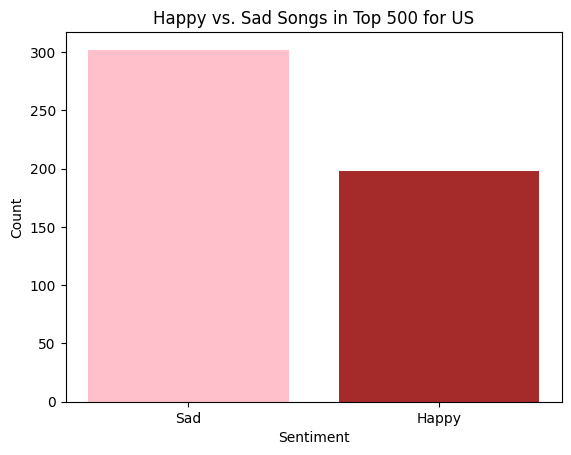

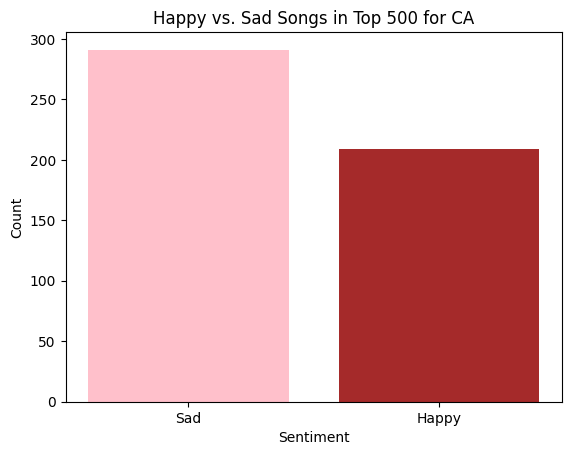

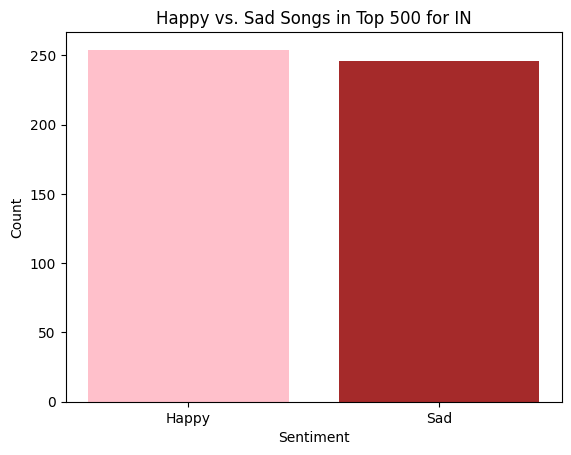

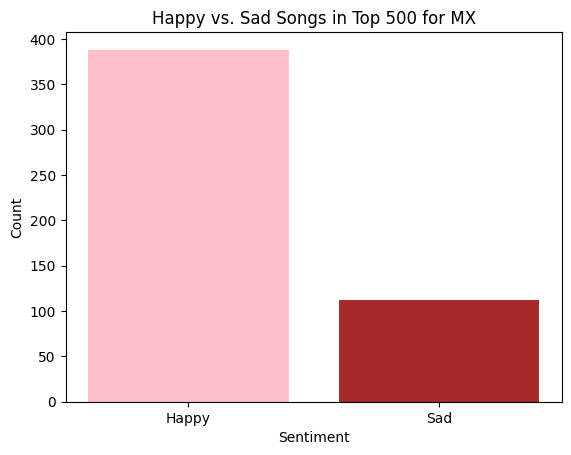

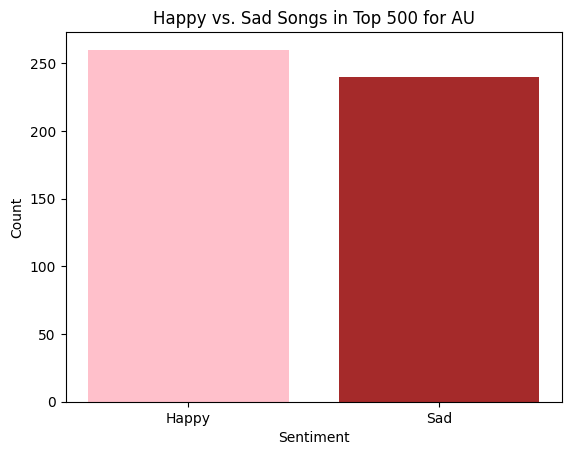

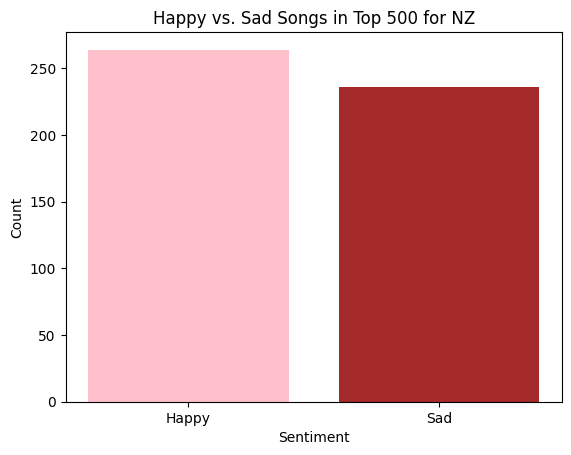

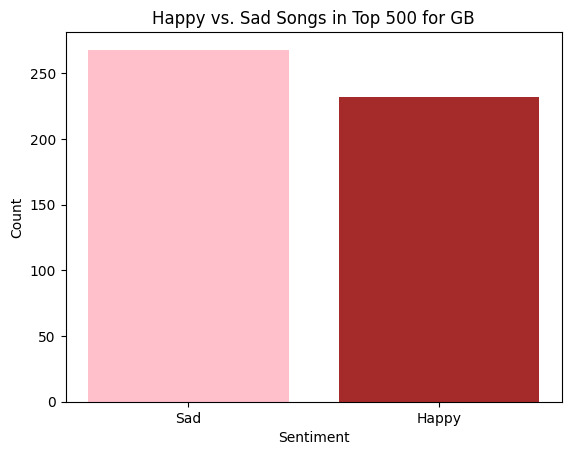

In [ ]:
#Song categorization based on mood using predictive modelling
import matplotlib.pyplot as plt

# Define the selected countries
selected_countries = ['US', 'CA', 'IN', 'MX', 'AU', 'NZ', 'GB']

# Iterate through each country
for country in selected_countries:
    # Create a subset of the DataFrame for the current country
    subset_data = song_data[song_data['country'] == country]

    # Get the top 500 songs for the current country
    top_500_songs = subset_data.nlargest(500, 'popularity')

    # Apply the condition to the 'valence' column
    top_500_songs["valence"] = ["Happy" if i >= 0.5 else "Sad" for i in top_500_songs.valence]

    # Display the value counts for the top 500 songs
    valence_counts = top_500_songs["valence"].value_counts()

    # Create a bar graph for the current country
    plt.bar(valence_counts.index, valence_counts.values, color=['pink', 'brown'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title(f'Happy vs. Sad Songs in Top 500 for {country}')
    plt.show()


In [ ]:
#sentiment analysis
!pip install textblob

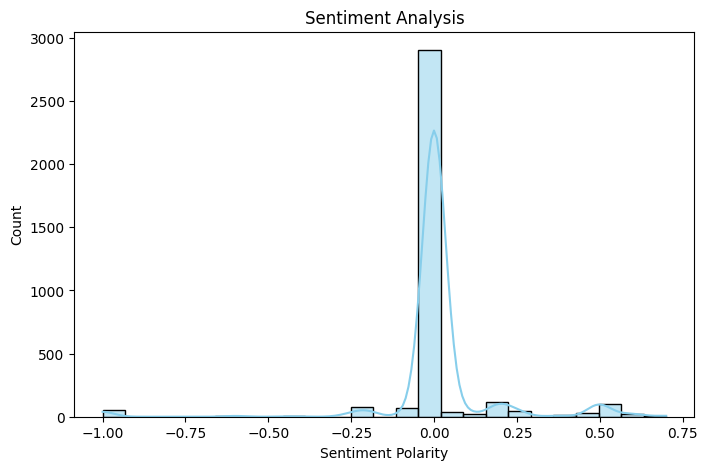

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'name' column to string and replace NaN with an empty string
filtered_df['name'] = filtered_df['name'].astype(str).replace('nan', '')

# Apply sentiment analysis using TextBlob to the 'name' column
filtered_df['sentiment'] = filtered_df['name'].map(lambda text: TextBlob(text).sentiment.polarity)

# Display the sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(filtered_df['sentiment'], bins=25, kde=True, color='skyblue')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

In [ ]:
filtered_df.head()

spotify_id                                           name  \
260  2YSzYUF3jWqb9YP9VXmpjE                             IDGAF (feat. Yeat)   
261  4MjDJD8cW7iVeWInc2Bdyj                                         MONACO   
262  3vkCueOmm7xQDoJ17W1Pm3                          My Love Mine All Mine   
263  1BxfuPKGuaTgP7aM0Bbdwr                                   Cruel Summer   
264  4KULAymBBJcPRpk1yO4dOG  I Remember Everything (feat. Kacey Musgraves)   

                         artists  daily_rank  daily_movement  weekly_movement  \
260                  Drake, Yeat           1               0                0   
261                    Bad Bunny           2               1                0   
262                       Mitski           3              -1                0   
263                 Taylor Swift           4               0                3   
264  Zach Bryan, Kacey Musgraves           5               1               -1   

    country snapshot_date  popularity  is_explicit  ...  loudness mode  \
260      US    2023-10-27          93         True  ...    -8.399    1   
261      US    2023-10-27          96         True  ...    -5.009    0   
262      US    2023-10-27          96        False  ...   -14.958    1   
263      US    2023-10-27         100        False  ...    -5.707    1   
264      US    2023-10-27          94        False  ...    -7.746    1   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
260      0.2710        0.0464          0.000089     0.205    0.138  136.952   
261      0.0680        0.1500          0.000402     0.580    0.130  139.056   
262      0.0321        0.8680          0.135000     0.158    0.121  113.950   
263      0.1570        0.1170          0.000021     0.105    0.564  169.994   
264      0.0459        0.5540          0.000002     0.102    0.155   77.639   

     time_signature  sentiment  
260               4        0.0  
261               4        0.0  
262               4        0.5  
263               4       -1.0  
264               4        0.0  

[5 rows x 26 columns]

In [ ]:
import numpy as np
import pandas as pd

cut = pd.cut(
    filtered_df['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
filtered_df['polarity'] = cut.values
filtered_df[['polarity','sentiment']].head()

polarity  sentiment
260   neutral        0.0
261   neutral        0.0
262  positive        0.5
263  negative       -1.0
264   neutral        0.0

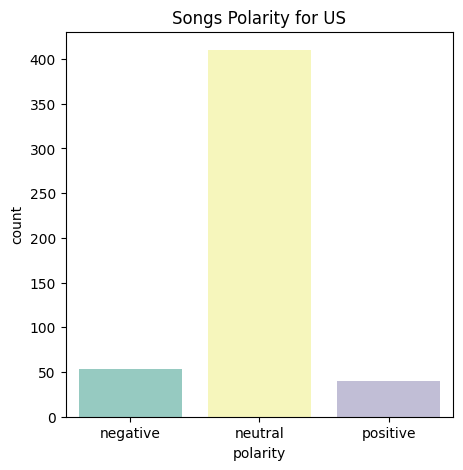

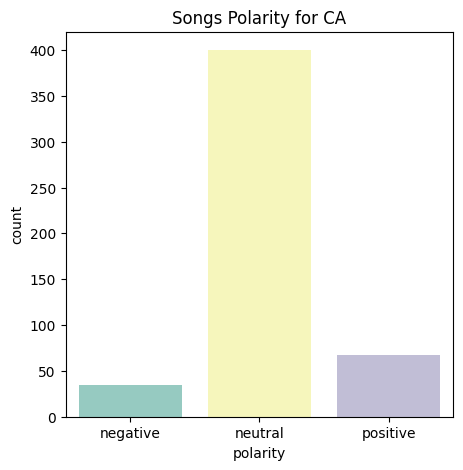

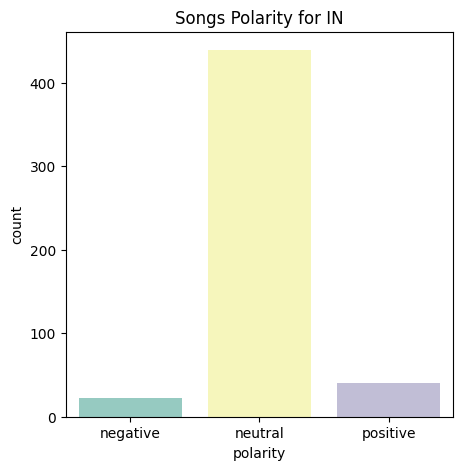

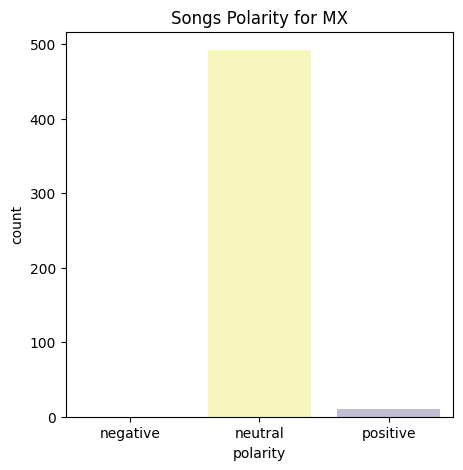

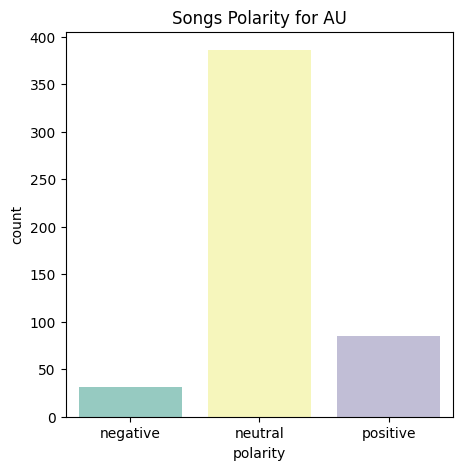

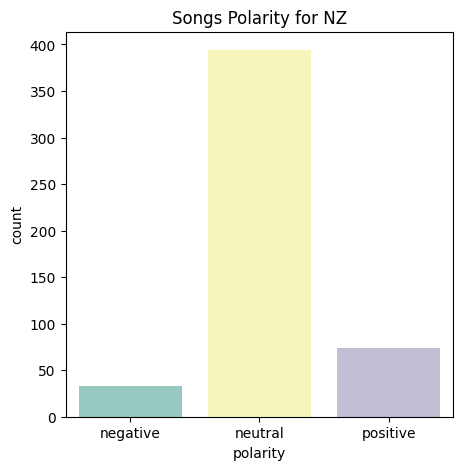

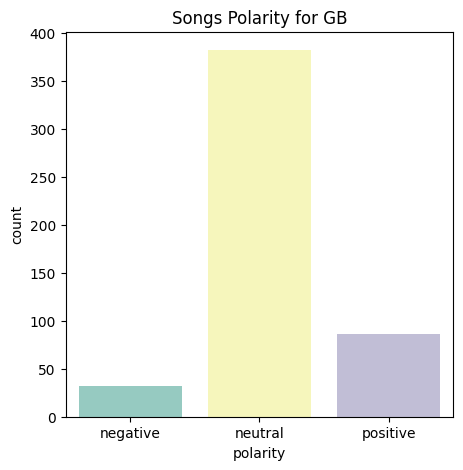

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the selected countries
selected_countries = ['US', 'CA', 'IN', 'MX', 'AU', 'NZ', 'GB']

# Iterate through each country
for country in selected_countries:
    # Create a subset of the DataFrame for the current country
    subset_data = filtered_df[filtered_df['country'].astype(str) == country]

    # Plot the count plot for 'polarity' for the current country
    plt.figure(figsize=(5, 5))
    sns.countplot(x='polarity', data=subset_data, palette='Set3')
    plt.title(f"Songs Polarity for {country}")
plt.show()

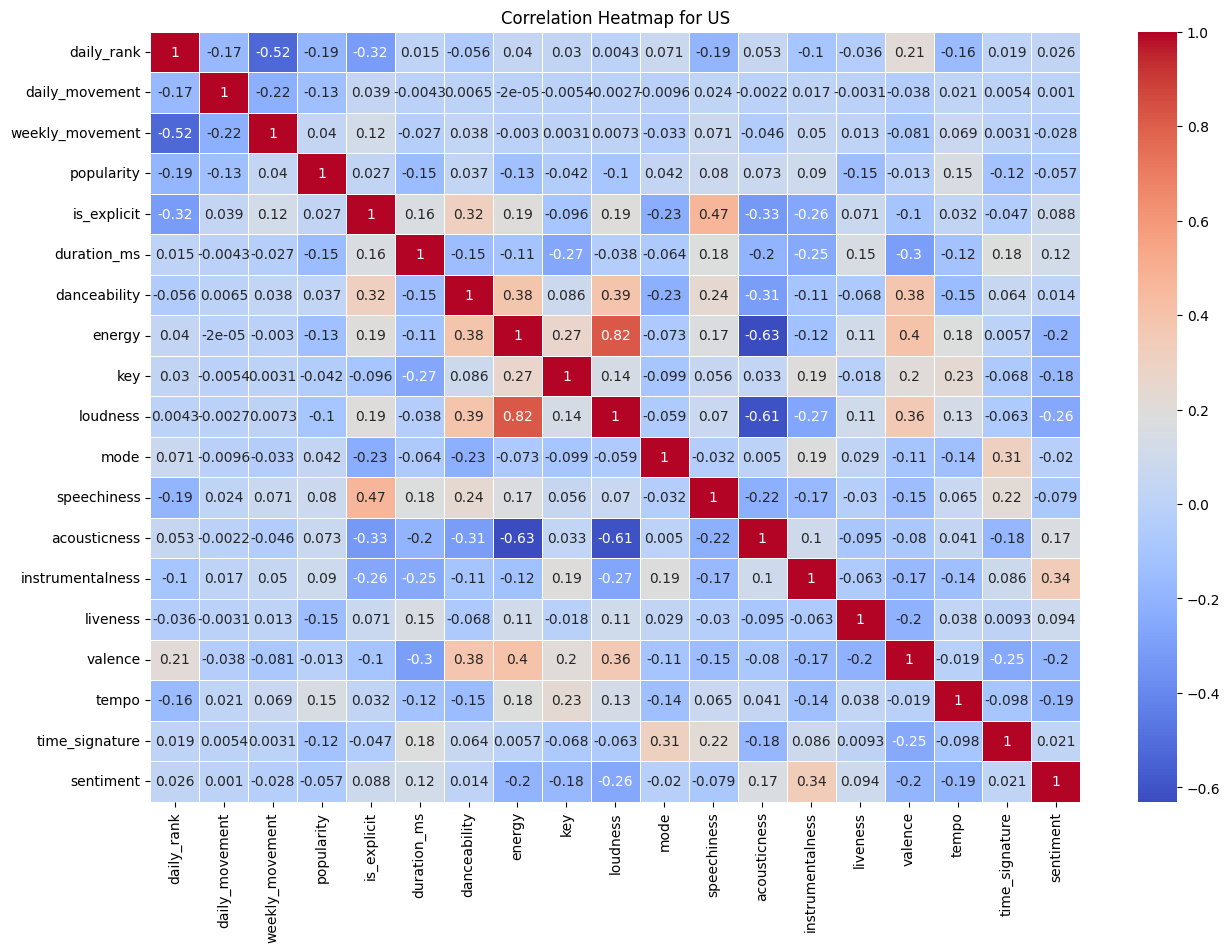

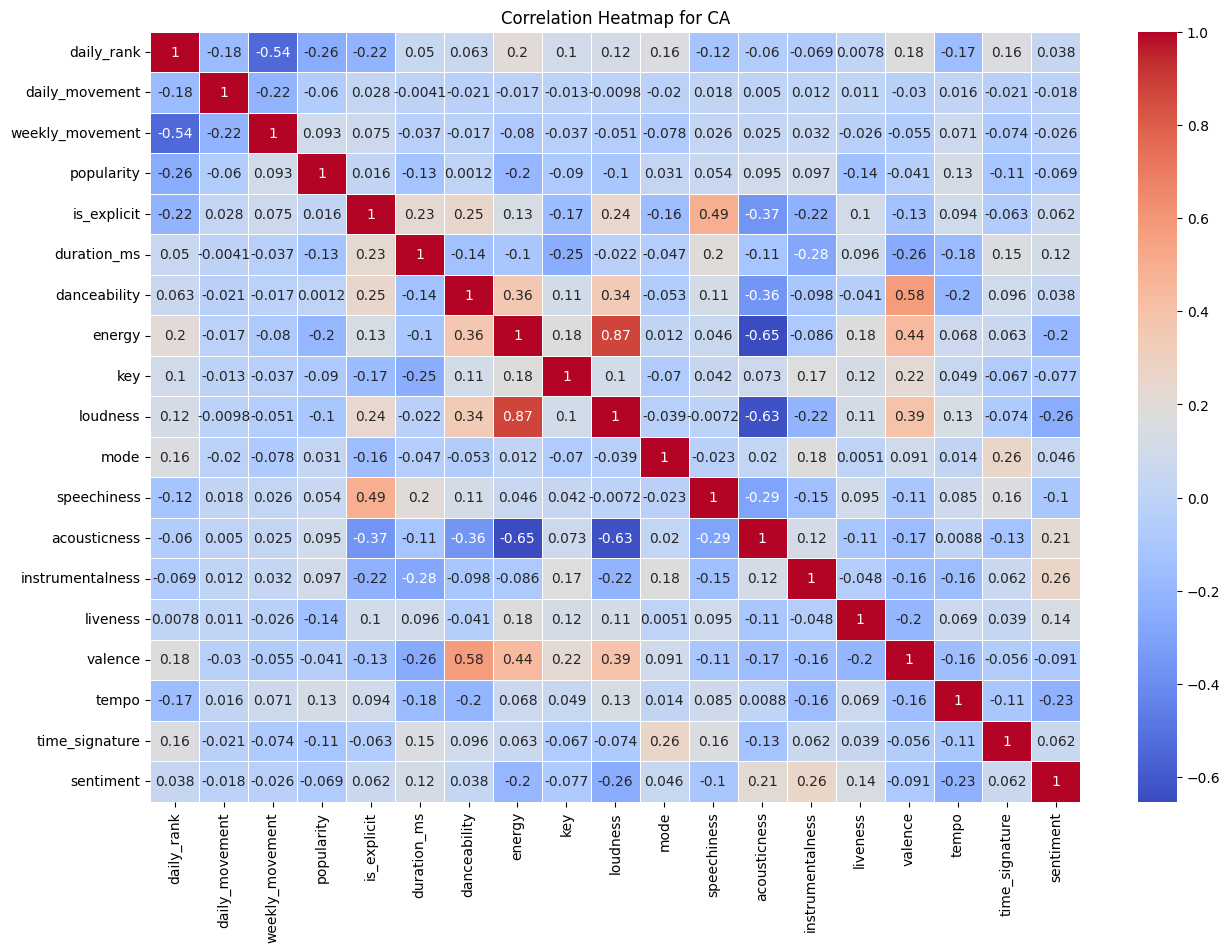

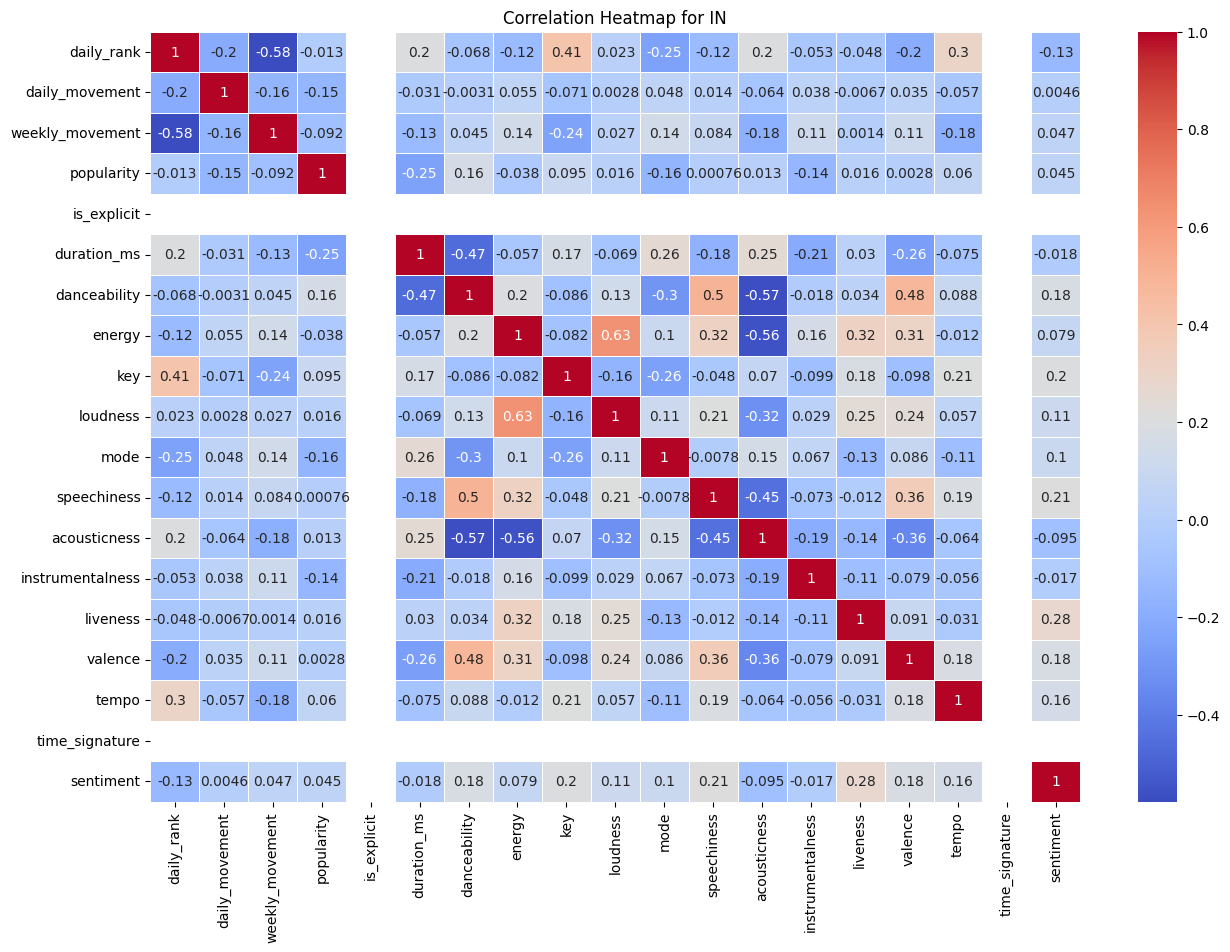

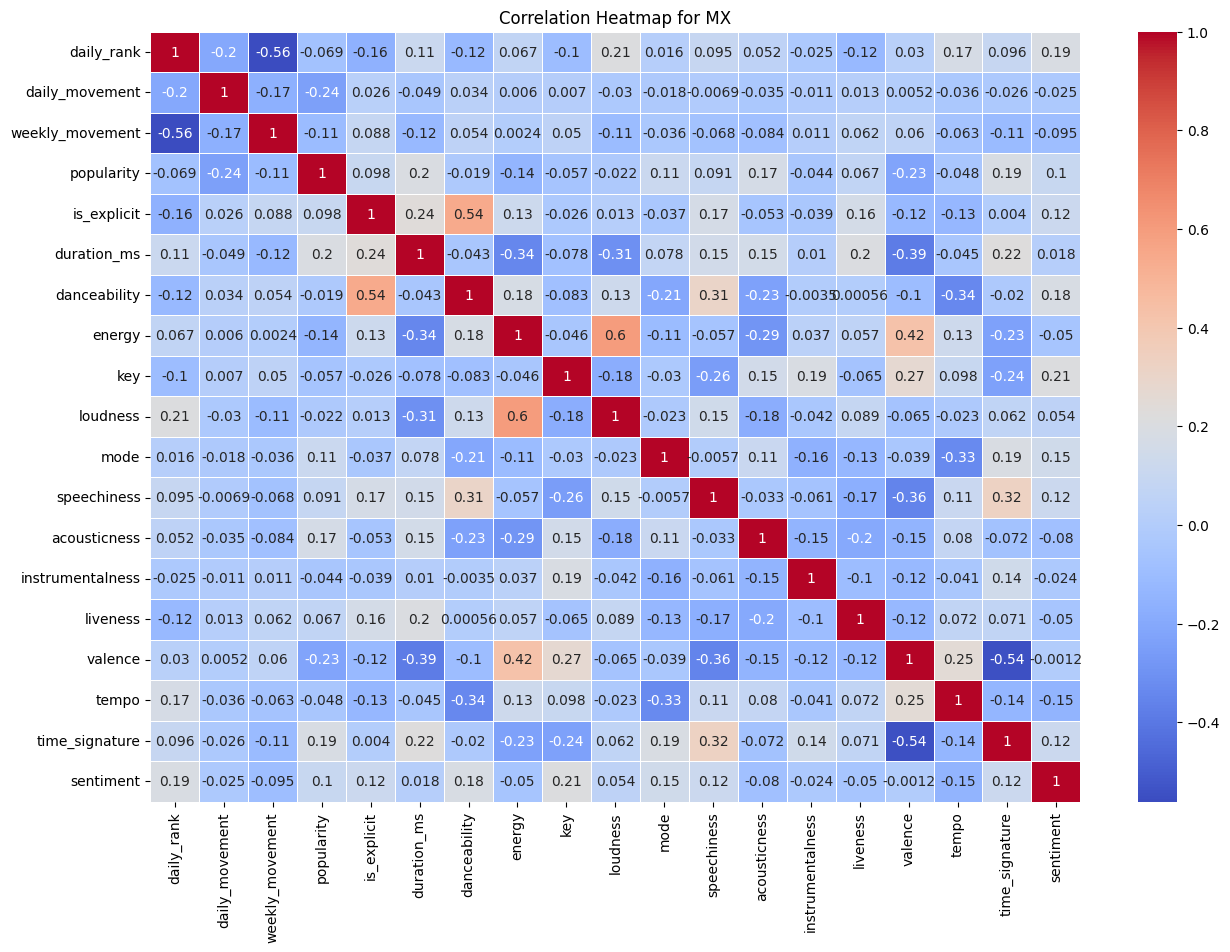

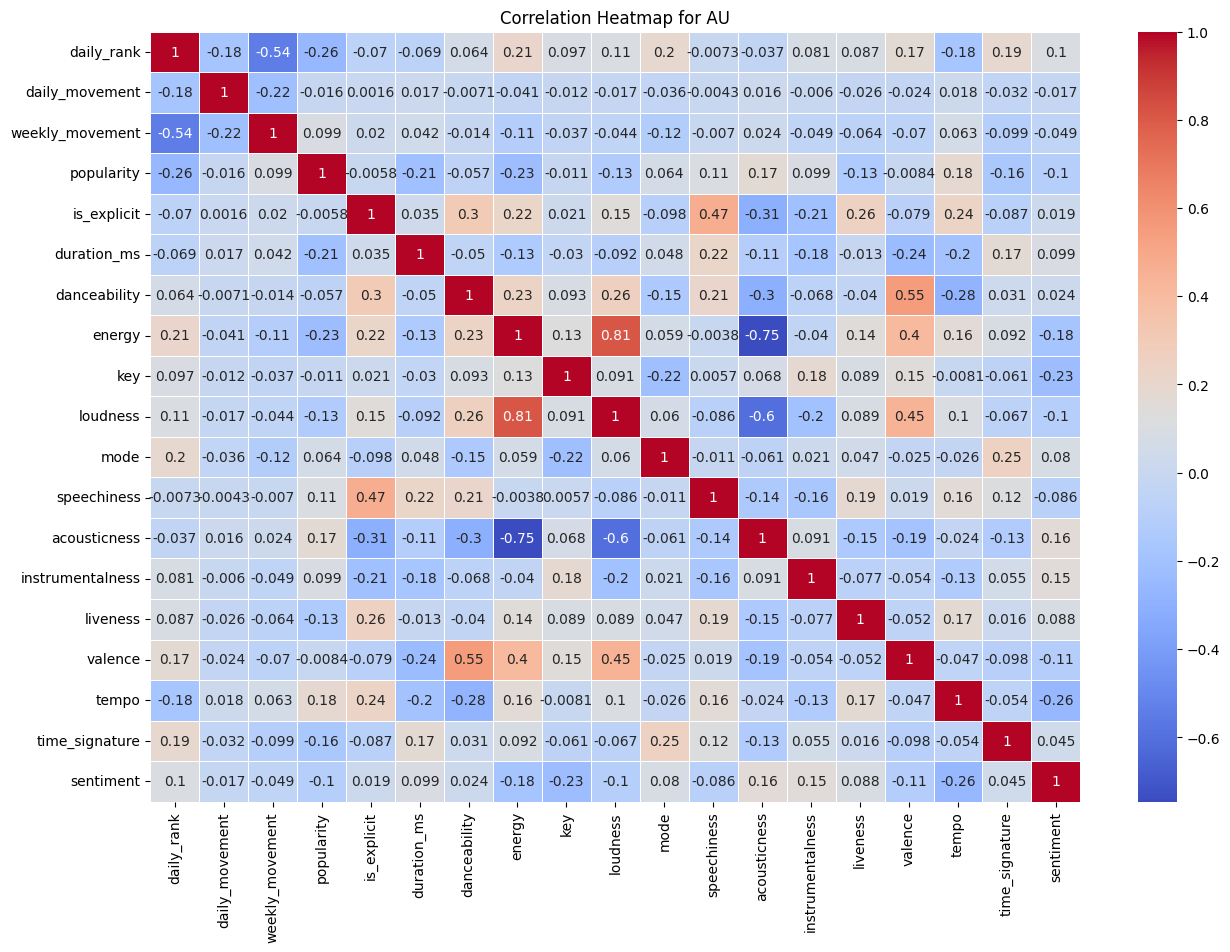

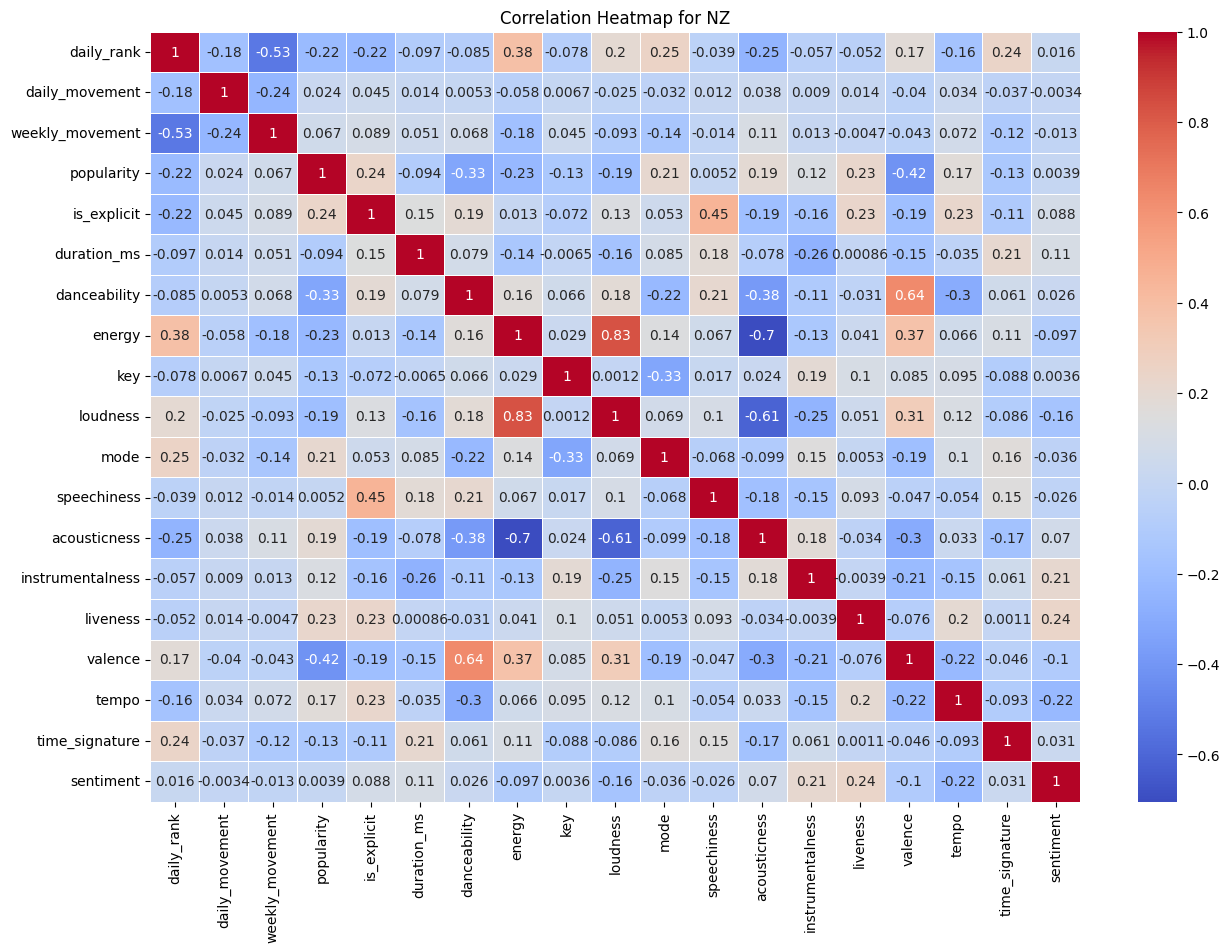

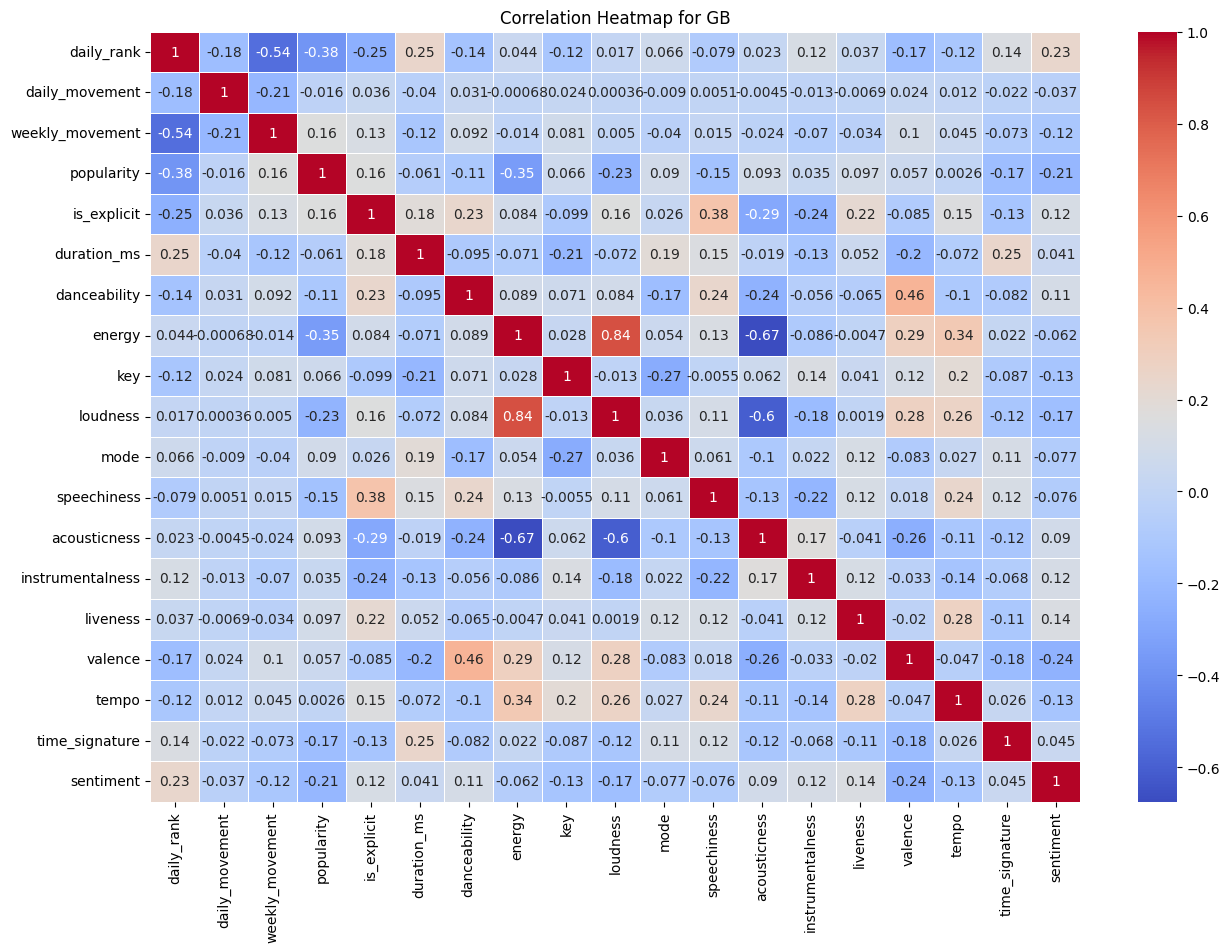

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called song_data

# Define the selected countries
selected_countries = ['US', 'CA', 'IN', 'MX', 'AU', 'NZ', 'GB']

# Iterate through each country
for country in selected_countries:
    # Create a subset of the DataFrame for the current country
    subset_data = filtered_df[filtered_df['country'] == country]

    # Calculate correlations for the subset
    correlation_matrix = subset_data.corr()

    # Plotting the heatmap for the current country
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Heatmap for {country}')
    plt.show()
